- doe-efficiency
    - x축
        - 100~1000개 trainset
    - y축
        - MAPE 성능  

### Test data 의 평균, 표준편차, 분산, 중앙값 계산

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
test = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/dataset/for-comparison-doe-and-random/doe/doe-test-293.csv')
real_right_dense = test['sp_smdm']
real_right_sparse = test['bz_smsm']

### right dense 계산

In [39]:
print("right dense 중앙값   : ",np.median(real_right_dense))
print("right dense 평균    : ",np.mean(real_right_dense))
print("right dense 표준편차 : ",np.std(real_right_dense))
print("right dense 분산    : ",np.var(real_right_dense))

right dense 중앙값   :  44862.0
right dense 평균    :  130786.02389078499
right dense 표준편차 :  232633.64613530782
right dense 분산    :  54118413314.20762


### right sparse 계산 

In [40]:
print("right sparse 중앙값   : ",np.median(real_right_sparse))
print("right sparse 평균    : ",np.mean(real_right_sparse))
print("right sparse 표준편차 : ",np.std(real_right_sparse))
print("right sparse 분산    : ",np.var(real_right_sparse))

right sparse 중앙값   :  42091.0
right sparse 평균    :  83034.66552901024
right sparse 표준편차 :  102683.6691931088
right sparse 분산    :  10543935918.9598


In [34]:
print("right dense 분산  : ",int(np.var(real_right_dense)))
print("right sparse 분산 : ",int(np.var(real_right_sparse)))

right dense 분산  :  54118413314
right sparse 분산 :  10543935918


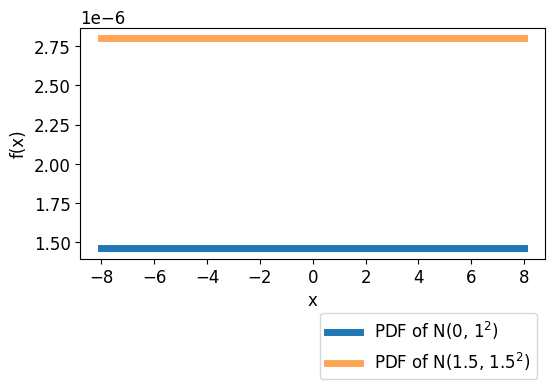

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

mu1, sigma1 = np.mean(real_right_dense), np.std(real_right_dense)
mu2, sigma2 = np.mean(real_right_sparse), np.std(real_right_sparse)

#x = np.linspace(-8, 8, 1000)
y1 = (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x-mu1)**2 / (2 * sigma1**2))
y2 = (1 / np.sqrt(2 * np.pi * sigma2**2)) * np.exp(-(x-mu2)**2 / (2 * sigma2**2))

plt.plot(x, y1, label=r'PDF of N(0, $1^2$)')
plt.plot(x, y2, alpha=0.7, label=r'PDF of N(1.5, $1.5^2$)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(bbox_to_anchor=(1.0, -0.2))
plt.show()

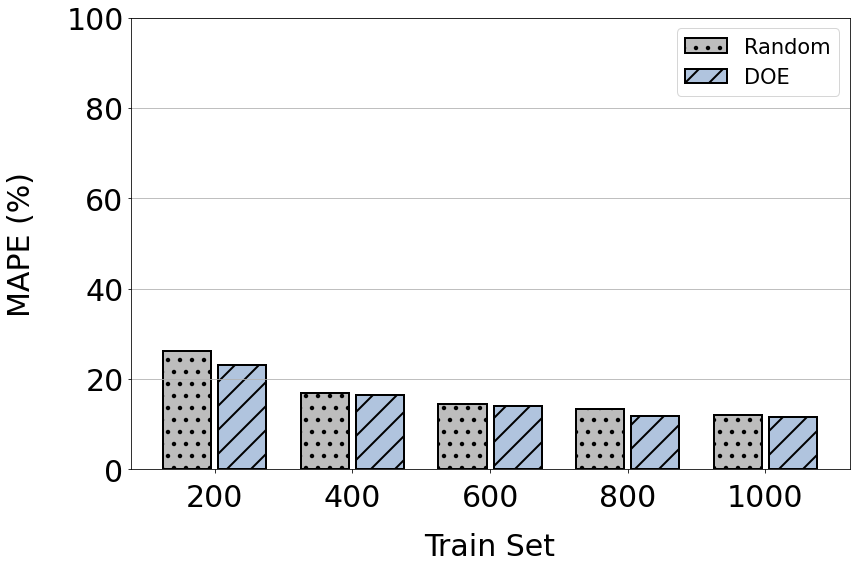

In [23]:


# x 축 label
x_label = ["200","400","600","800","1000" ]

# Random MAPE (bz_smsm)
bz_smsm_random_mape = [82.16, 90.90, 25.27, 24.35, 20.83] 
# DOE MAPE (bz_smsm)
bz_smsm_doe_mape = [74.41, 24.01, 22.48, 16.34, 14.19]

# Random MAPE (sp_smdm)
sp_smdm_random_mape = [26.31, 16.94, 14.38, 13.25, 12.08] 
# DOE MAPE (sp_smdm)
sp_smdm_doe_mape = [23.03, 16.47, 13.97, 11.88, 11.62]

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.7)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

x = np.arange(len(x_label)) # x축 인덱스
width = 0.35 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
# bar2 = ax1.bar(x - 0.2, sp_smdm_random_mape, width, linewidth=2, edgecolor='black', hatch='.', label='Random', color='lightsteelblue', capsize=4)
# bar1 = ax1.bar(x + 0.2, sp_smdm_doe_mape, width, linewidth=2, edgecolor='black', hatch='/', label='DOE', color='royalblue', capsize=4)
bar2 = ax1.bar(x - 0.2, sp_smdm_random_mape, width, linewidth=2, edgecolor='black', hatch='.', label='Random', color='#BDBDBD', capsize=4)
bar1 = ax1.bar(x + 0.2, sp_smdm_doe_mape, width, linewidth=2, edgecolor='black', hatch='/', label='DOE', color='lightsteelblue', capsize=4)



################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(x_label) # x축 label 이름
ax1.tick_params(axis='x',pad=10) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 100])  # 좌측 y축 범위 설정
# ax1.set_yticks([0, 10, 20, 30, 40]) # y축 index 설정

ax1.set_xlabel('Train Set', labelpad=20) # ax1 ylabel 설정
ax1.set_ylabel('MAPE (%)', labelpad=30) # ax1 ylabel 설정

ax1.legend(loc="upper right") # 범례 표시

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./right-dense-compare-doe-random.png')
plt.show()

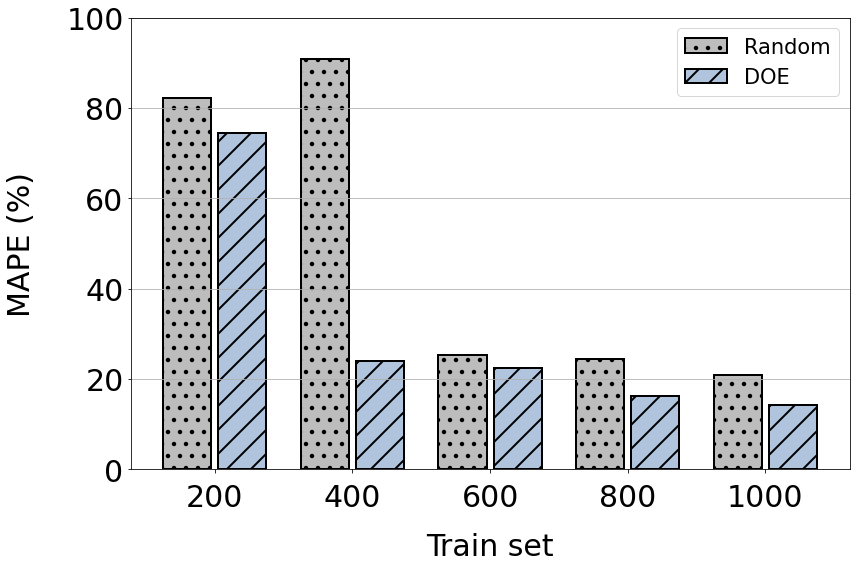

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# x 축 label
x_label = ["200","400","600","800","1000" ]

# Random MAPE (bz_smsm)
bz_smsm_random_mape = [82.16, 90.90, 25.27, 24.35, 20.83] 
# DOE MAPE (bz_smsm)
bz_smsm_doe_mape = [74.41, 24.01, 22.48, 16.34, 14.19]

# Random MAPE (sp_smdm)
sp_smdm_random_mape = [26.31, 16.94, 14.38, 13.25, 12.08] 
# DOE MAPE (sp_smdm)
sp_smdm_doe_mape = [23.03, 16.47, 13.97, 11.88, 11.62]

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.7)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

x = np.arange(len(x_label)) # x축 인덱스
width = 0.35 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar2 = ax1.bar(x - 0.2, bz_smsm_random_mape, width, linewidth=2, edgecolor='black', hatch='.', label='Random', color='#BDBDBD', capsize=4)
bar1 = ax1.bar(x + 0.2, bz_smsm_doe_mape, width, linewidth=2, edgecolor='black', hatch='/', label='DOE', color='lightsteelblue', capsize=4)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(x_label) # x축 label 이름
ax1.tick_params(axis='x',pad=10) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 100])  # 좌측 y축 범위 설정
# ax1.set_yticks([0, 10, 20, 30, 40]) # y축 index 설정

ax1.set_xlabel('Train set', labelpad=20) # ax1 ylabel 설정
ax1.set_ylabel('MAPE (%)', labelpad=30) # ax1 ylabel 설정

ax1.legend(loc="upper right") # 범례 표시

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./right-sparse-compare-doe-random.png')
plt.show()